In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 

In [4]:
haha= pd.read_csv("data_pr_REG.csv")
haha = haha.replace({True: 1, False: 0})
haha.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,1,1,1,Shahran,1.850000e+09,61666.67
1,60,1,1,1,1,Shahran,1.850000e+09,61666.67
2,79,2,1,1,1,Pardis,5.500000e+08,18333.33
3,95,2,1,1,1,Shahrake Qods,9.025000e+08,30083.33
4,123,2,1,1,1,Shahrake Gharb,7.000000e+09,233333.33


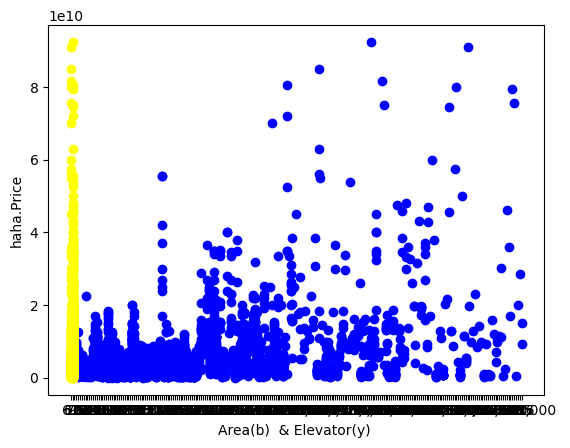

In [5]:
plt.scatter(haha.Area , haha.Price,  color='blue')
plt.scatter(haha.Elevator , haha.Price,  color="yellow")
plt.xlabel("Area(b)  & Elevator(y) ")
plt.ylabel("haha.Price")
plt.show()

We have outliers

Text(0.5, 0, 'Room(p) & Parking(g) & Warehouse(r)')

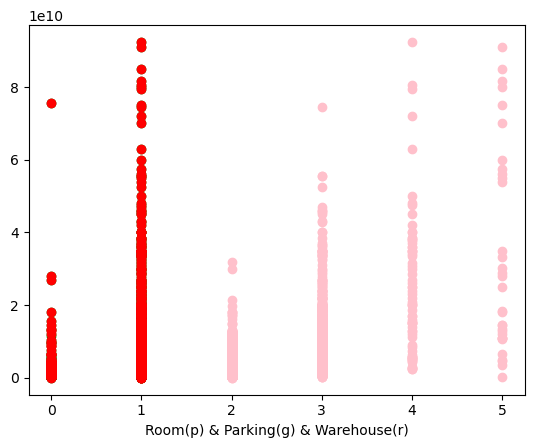

In [6]:
plt.scatter(haha.Room , haha.Price,  color='pink')
plt.scatter(haha.Parking , haha.Price,  color="green")
plt.scatter(haha.Warehouse , haha.Price,  color="red")
plt.xlabel("Room(p) & Parking(g) & Warehouse(r)")

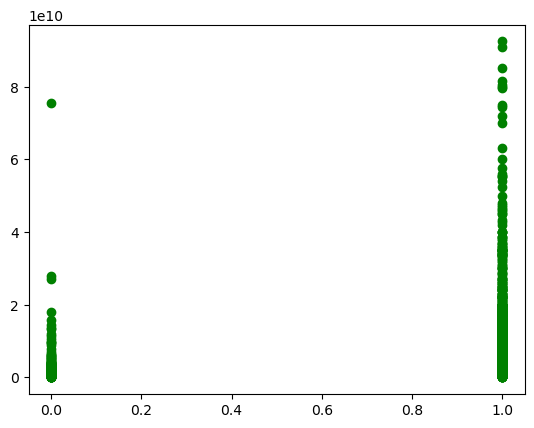

In [7]:
plt.scatter(haha.Parking , haha.Price,  color="green")

# Remove outliers

In [8]:
haha['Area'] = pd.to_numeric(haha['Area'], errors='coerce')
mean = np.mean(haha["Area"])
std_dev = np.std(haha["Area"])

q1 = haha["Area"].quantile(0.25)
q3 = haha["Area"].quantile(0.75)
iqr = q3 - q1
#print(iqr)
for i in haha.index:
    if haha.loc[i , "Area" ] > (q3+ 1.5*iqr):
        haha.drop(i , inplace= True)
haha.dropna(inplace=True)

# Normalize Data

In [9]:
from sklearn import preprocessing
haha['Area'] = pd.to_numeric(haha['Area'], errors='coerce')
X= haha[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']]
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[-0.8955872 , -1.49374241,  0.43698159,  0.30660308,  0.51193995],
       [-0.98445332, -1.49374241,  0.43698159,  0.30660308,  0.51193995],
       [-0.42163453,  0.02410024,  0.43698159,  0.30660308,  0.51193995],
       [ 0.05231813,  0.02410024,  0.43698159,  0.30660308,  0.51193995],
       [ 0.8817353 ,  0.02410024,  0.43698159,  0.30660308,  0.51193995]])

In [10]:
y =  haha[['Price(USD)']]
y = preprocessing.StandardScaler().fit(y).transform(y.astype(float))
y[0:5]


array([[-0.53391753],
       [-0.53391753],
       [-0.87003226],
       [-0.77889347],
       [ 0.79761364]])

# model

In [13]:
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import linear_model
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
model = LinearRegression()
model.fit(X_train, y_train)

Train set: (2569, 5) (2569, 1)
Test set: (643, 5) (643, 1)


LinearRegression()

In [14]:
print ('zarayebe XS: ', model.coef_)
print('arzaz mabda:', model.intercept_)

zarayebe XS:  [[ 0.81159475 -0.11926789  0.04457398  0.03060107  0.00971287]]
arzaz mabda: [-0.00138639]


# Evaluation

In [15]:
yhat = model.predict(X_test)
yhat[0:5]

array([[ 1.5738798 ],
       [ 0.6009372 ],
       [ 2.12682494],
       [-0.51797791],
       [-0.62633935]])

In [16]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

yhat = model.predict(X_test)
mse = mean_squared_error(y_test, yhat)
mae = mean_absolute_error(y_test, yhat)
r2 = r2_score(y_test, yhat)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2) score:", r2)

Mean Squared Error (MSE): 0.4475088108315465
Mean Absolute Error (MAE): 0.4484409000215389
R-squared (R2) score: 0.5378203586159647


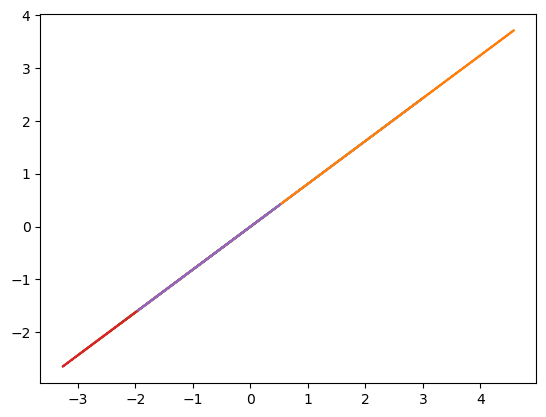

In [17]:
plt.plot(X_train , model.intercept_[0]  + model.coef_[0][0]* X_train)